# Final Project

In [1]:
import sys
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn
import matplotlib.pyplot as plt


# 1. Preparing the data:

### Loading the data to panda dataframes

### analyze missing values
 

In [2]:
pd.options.display.max_columns = None

data = pd.read_csv('hotel_bookings.csv')

data.head()

dataset = data.copy()
# Find the missing values and print the num of null values for each feature
print("The num of null values at each column:")
dataset.isnull().sum()


The num of null values at each column:


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## 2. Place the appropriate value instead of missing ones

* This is evident that four columns have null values that should be cared of


In [3]:
# Where agent_id or company_id is null, we replace it by 0
dataset[['agent','company']] = dataset[['agent','company']].fillna(0)

# Where country field is null we replace it by the most frequent country in the dataset
dataset['country'].fillna(data.country.mode().to_string(), inplace=True)

# Where children field is null we replace it by the mean of the children column
dataset['children'].fillna(round(data.children.mean()), inplace=True)

dataset.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0.0,0,Transient,105.50,0,0,Canceled,2015-04-22


## 3. Some data preprocessing jobs to do
* we can do a trick by removing two columns "previous_cancellations" and "previous_bookings_not_canceled" and   creating a new column "total_canceled", because at the end this is the information we care for.

* With a instant look at the dataset this is obvious that the feature "reservation_status" tells us if a       reservation is cancelled!, and as you can see this makes our training approach dependent completely to the  training_set 

* The most common way to find out what features are less informative and should be droped 
  is the correlation table, which give us a view of the strong and weak relationships between is_cancelled 
  and all other features.



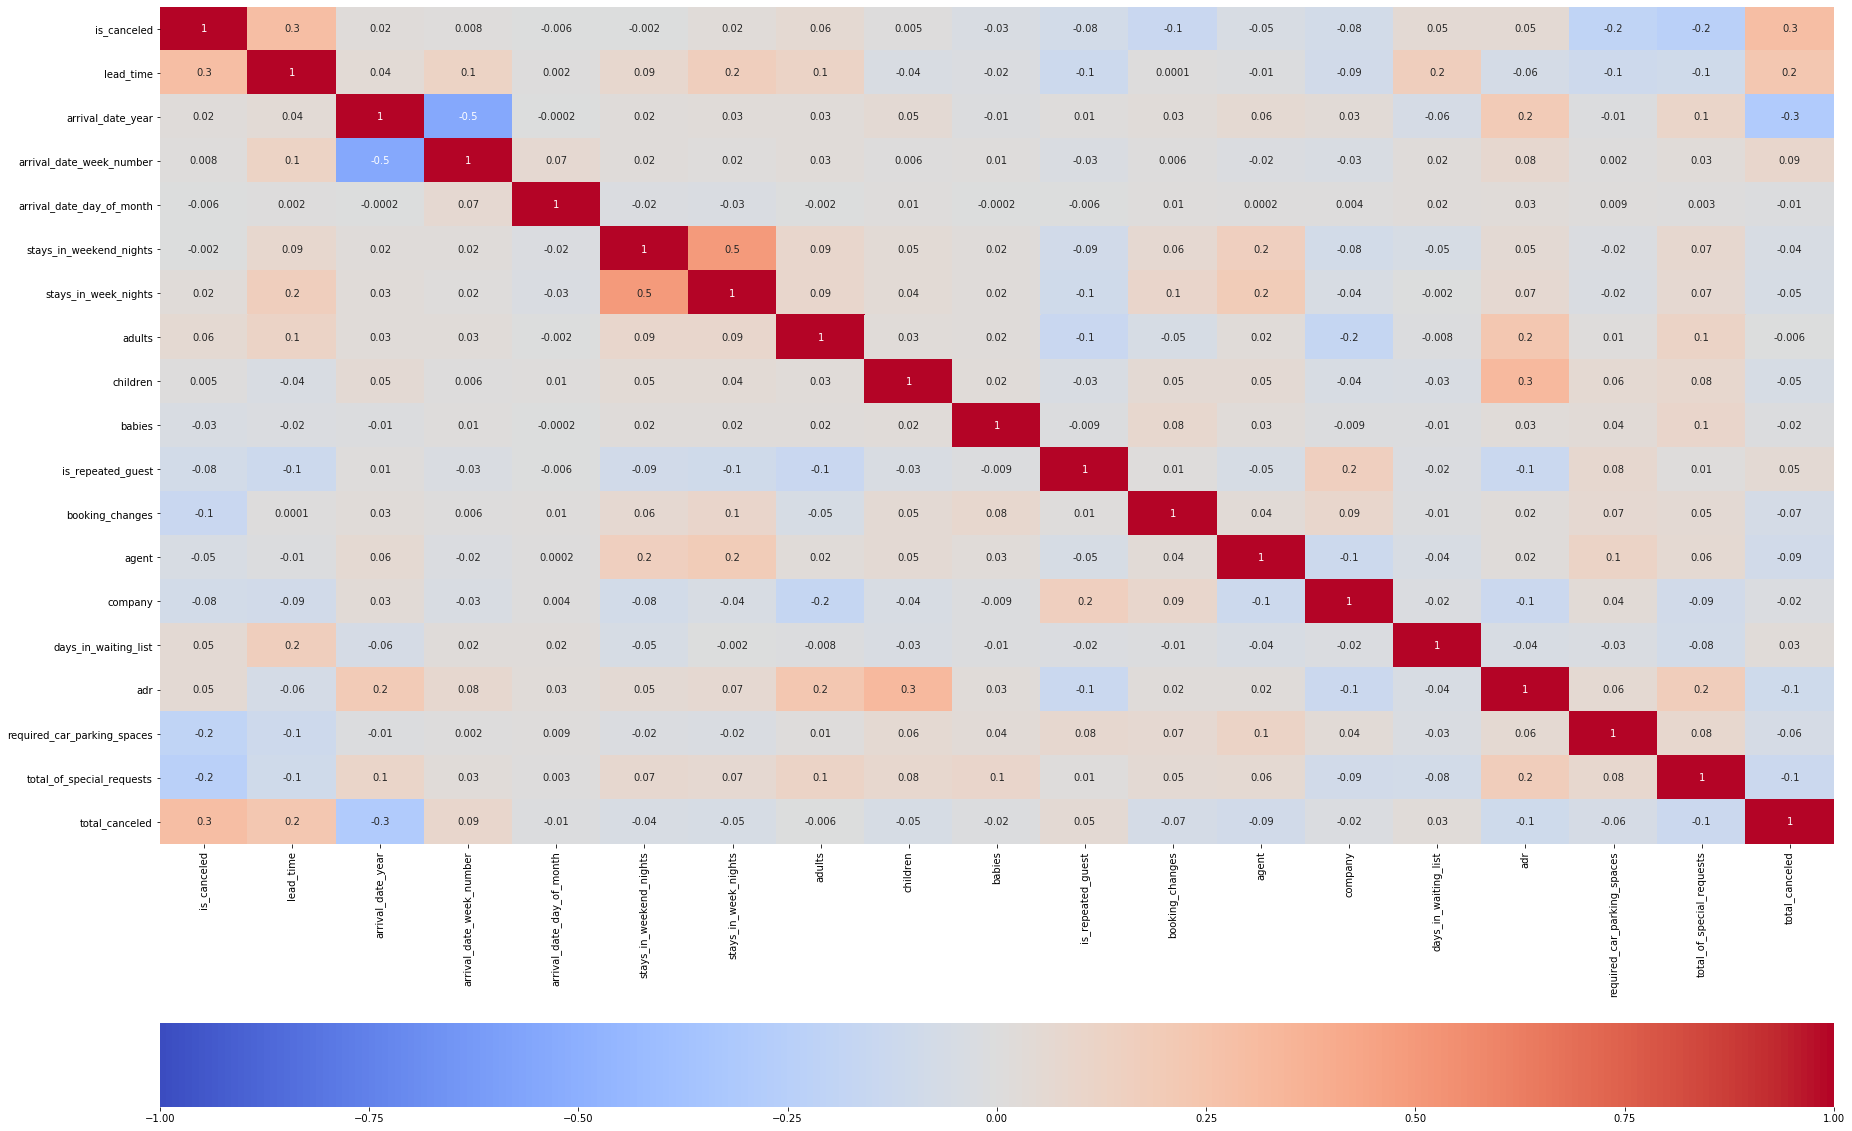

In [4]:
df = dataset.copy()

df['total_canceled'] = 0
df.loc[ df['previous_cancellations'] > df['previous_bookings_not_canceled'] , 'total_canceled'] = 1

df = df.drop(['previous_cancellations', 'previous_bookings_not_canceled'], axis=1)


df = df.drop(['reservation_status'], axis=1)


# df.head(50)


fig, ax = plt.subplots(figsize=(30,22))
seaborn.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', 
               cbar_kws= {'orientation': 'horizontal'});

## 4. Dropping the less informative features

As you can see from the above correlation table and its values, some features are likely to be informative because of the low value of their correllation with the target feature "is_canceled"

In [5]:
df = df.drop(['booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 
              'company', 'is_repeated_guest'], axis=1)

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,reservation_status_date,total_canceled
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,0.0,0,Transient,0.0,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,0.0,0,Transient,0.0,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,A,C,No Deposit,0.0,0,Transient,75.0,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,A,A,No Deposit,304.0,0,Transient,75.0,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240.0,0,Transient,98.0,2015-07-03,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240.0,0,Transient,98.0,2015-07-03,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,0.0,0,Transient,107.0,2015-07-03,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,C,C,No Deposit,303.0,0,Transient,103.0,2015-07-03,0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,A,A,No Deposit,240.0,0,Transient,82.0,2015-05-06,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,D,D,No Deposit,15.0,0,Transient,105.5,2015-04-22,0


## 5. Dealing with Categorical variables

In [6]:
def categorical_to_numerical(dataframe):
    le = LabelEncoder()
        
    categorical_cols = list(dataframe.columns[dataframe.dtypes == object])
    
    return dataframe[categorical_cols].apply(lambda x: le.fit_transform(x))

new_numericals = categorical_to_numerical(df)

categorical_cols = list(df.columns[df.dtypes == object])
df[categorical_cols] = new_numericals
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,reservation_status_date,total_canceled
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,136,3,1,2,2,0,0.0,0,2,0.0,121,0
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,136,3,1,2,2,0,0.0,0,2,0.0,121,0
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,60,3,1,0,2,0,0.0,0,2,75.0,122,0
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,60,2,0,0,0,0,304.0,0,2,75.0,122,0
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,60,6,3,0,0,0,240.0,0,2,98.0,123,0
5,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,60,6,3,0,0,0,240.0,0,2,98.0,123,0
6,1,0,0,2015,5,27,1,0,2,2,0.0,0,0,136,3,1,2,2,0,0.0,0,2,107.0,123,0
7,1,0,9,2015,5,27,1,0,2,2,0.0,0,1,136,3,1,2,2,0,303.0,0,2,103.0,123,0
8,1,1,85,2015,5,27,1,0,3,2,0.0,0,0,136,6,3,0,0,0,240.0,0,2,82.0,72,0
9,1,1,75,2015,5,27,1,0,3,2,0.0,0,2,136,5,3,3,3,0,15.0,0,2,105.5,61,0


## 5. Spliting the data
For this part we just used the method train_test_split from sklearn library

In [7]:
y = df['is_canceled']
X = df.drop('is_canceled', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train[0:10]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,days_in_waiting_list,customer_type,adr,reservation_status_date,total_canceled
39149,1,8,2017,1,32,6,2,1,2,2.0,0,0,52,6,3,6,6,0,240.0,0,2,324.0,891,0
47835,0,63,2016,7,10,5,2,1,2,0.0,0,0,136,6,3,0,1,0,9.0,0,3,80.3,372,0
60806,0,216,2016,9,48,22,0,1,1,0.0,0,0,136,2,0,0,3,1,0.0,0,3,137.0,592,0
38501,1,158,2017,5,29,16,2,2,2,0.0,0,0,35,5,3,0,0,0,410.0,0,2,118.0,871,0
34669,1,9,2017,7,13,30,0,2,1,0.0,0,0,136,6,3,0,0,0,241.0,0,2,63.0,761,0
40582,0,117,2015,1,31,1,2,1,2,0.0,0,2,82,5,3,0,0,0,17.0,0,3,94.5,148,0
46288,0,146,2015,2,53,29,0,3,2,0.0,0,0,13,5,3,0,0,0,21.0,99,3,75.0,305,0
49713,0,54,2016,0,17,18,1,0,2,0.0,0,3,81,6,3,0,0,0,9.0,0,3,85.5,413,0
105238,0,19,2017,3,5,1,0,2,1,0.0,0,0,13,6,3,0,0,0,9.0,0,2,98.0,704,0
116462,0,183,2017,5,29,17,1,3,2,2.0,0,0,77,3,1,5,5,0,14.0,0,2,174.6,872,0


## 6. Training and Classification



### First Approach: Bagging Ensemble 
In scikit-learn, bagging methods are offered as a unified BaggingClassifier meta-estimator (resp. BaggingRegressor), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. In particular, max_samples and max_features control the size of the subsets (in terms of samples and features)

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

max_samples=0.5 
max_features=0.5

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = max_samples, max_features = max_features)
 
bagging = bagging.fit(X_train, y_train)

print(f'Accuracy of the classifier for max_samples = {max_samples} and max_features = {max_features} :'
      + str(bagging.score(X_test, y_test)))



Accuracy of the classifier for max_samples = 0.5 and max_features = 0.5 :0.9244492838596198


### Second Approach: MLP Classifier
Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples

* Activation function for hidden layers : ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* 

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='logistic', random_state=1)

mlp = mlp.fit(X_train, y_train)

print('Accuracy of the mlp classifier is: ' + str(mlp.score(X_test, y_test)))

Accuracy of the mlp classifier is: 0.971605662115755
